# Pyber Homework 5

### Observations:

1. Urban cities have the highest driver count as well as overall number of rides given compared to suburban and rural cities.
2. The number of drivers available appears to be proportionate to the number of rides given; the higher the number of drivers, the higher the number of rides.
3. The percent of fares is proportionate to the number of rides; the higher the number of rides given, the higher the total percent of fares obtained.  As a result, urban areas score highest in all three categories, total fares, total rides and total drivers.

In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Remove duplicate data from city data
city_data = city_data.drop_duplicates('city')

# Double check imports worked for city data
city_data.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Double check imports worked for ride data
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset
pyber_df = city_data.merge(ride_data, on = 'city', how = 'outer')

# Display the data table for preview
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

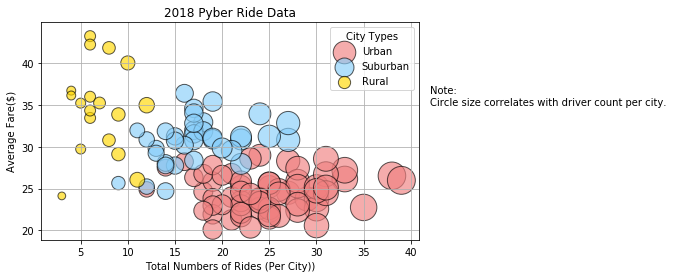

In [52]:
# Obtain the x and y coordinates for each of the three city types
urban = pyber_df.loc[(pyber_df["type"] == "Urban")]
suburban = pyber_df.loc[(pyber_df["type"] == "Suburban")]
rural = pyber_df.loc[(pyber_df["type"] == "Rural")]

# Build the scatter plots for each city types:
# Average Fare, Total Rides and Total Drivers for Urban cities
urban_avgfare = urban.groupby(['city'])['fare'].mean()
urban_ridettl = urban.groupby(['city']).count()['ride_id']
urban_drivettl = urban.groupby(['city'])['driver_count'].value_counts()

# Average Fare, Total Rides and Total Drivers for Suburban cities
suburban_avgfare = suburban.groupby(['city'])['fare'].mean()
suburban_ridettl = suburban.groupby(['city']).count()['ride_id']
suburban_drivettl = suburban.groupby(['city'])['driver_count'].value_counts()

# Average Fare, Total Rides and Total Drivers for Rural cities
rural_avgfare = rural.groupby(['city'])['fare'].mean()
rural_ridettl = rural.groupby(['city']).count()['ride_id']
rural_drivettl = rural.groupby(['city'])['driver_count'].value_counts()

# Scatter plots for city types with 
plt.scatter(urban_ridettl, urban_avgfare, s=urban_drivettl*20,
            marker ='o', facecolors ="lightcoral", edgecolors='black', alpha = 0.65, linewidth = 1, label="Urban")

plt.scatter(suburban_ridettl, suburban_avgfare, s=suburban_drivettl*20,
            marker ='o', facecolors ="lightskyblue", edgecolors='black', alpha = 0.65, linewidth = 1, label="Suburban")

plt.scatter(rural_ridettl, rural_avgfare, s=rural_drivettl*20,
            marker ='o', facecolors ="gold", edgecolors='black', alpha = 0.65, linewidth = 1, label="Rural")

# Incorporate the other graph properties: Title, x-label, y-label, and legend
# Chart title
plt.title("2018 Pyber Ride Data")

# x label
plt.xlabel("Total Numbers of Rides (Per City))")

# y label
plt.ylabel("Average Fare($)")

# legend 
plt.legend(title='City Types')

# Incorporate a text label regarding circle size
text = 'Note:\nCircle size correlates with driver count per city.'
plt.text(42, 35, text, fontsize=10)
plt.grid(True)
plt.subplots_adjust(right=1)

# Save Figure
plt.savefig("2018 Pyber Ride Data.png")

# Show plot
plt.show()

## Total Fares by City Type

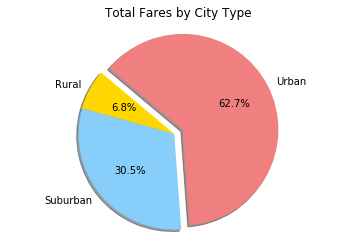

In [64]:
# Calculate Type Percents
total_fare = pyber_df.groupby(['type'])['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("Total Fares by City Type")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%.1f%%",shadow=True, startangle=140)
plt.axis("equal")


# Save Figure
plt.savefig("Total Fares by City Type.png")

# Show Figure
plt.show()

## Total Rides by City Type

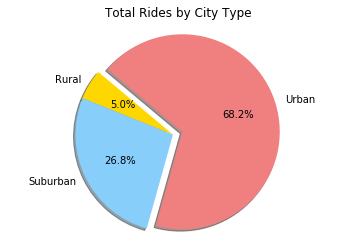

In [67]:
# Calculate Ride Percents
total_rides = pyber_df.groupby(['type'])['ride_id'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("Total Rides by City Type")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct="%.1f%%",shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("Total Rides by City Type.png")

# Show figure
plt.show()

## Total Drivers by City Type

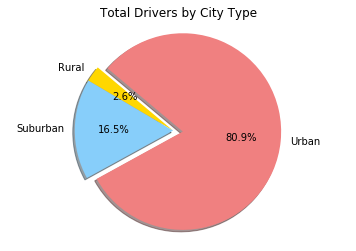

In [70]:
# Calculate Driver Percents
total_drivers = city_data.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("Total Drivers by City Type")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%.1f%%",shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("Total Drivers by City Type.png")

# Show figure
plt.show()